START HERE

In [13]:
from osgeo import gdal
import glob

#Build Pre event mosaic
!gdalbuildvrt pre_vrt_v2.vrt Pre-event-v2/*.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [14]:
#Build Post event mosaic
!gdalbuildvrt post_vrt_v2.vrt Post-event-v2/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [16]:
#info about each file
!gdalinfo post_vrt_v2.vrt
!gdalinfo pre_vrt_v2.vrt

Driver: VRT/Virtual Raster
Files: post_vrt_v2.vrt
       Post-event-v2/10300100ED11EA00_120202003120.tif
       Post-event-v2/10300100ED11EA00_120202003121.tif
       Post-event-v2/10300100ED11EA00_120202003122.tif
       Post-event-v2/10300100ED11EA00_120202003123.tif
       Post-event-v2/10300100ED11EA00_120202003130.tif
       Post-event-v2/10300100ED11EA00_120202003131.tif
       Post-event-v2/10300100ED11EA00_120202003132.tif
       Post-event-v2/10300100ED11EA00_120202003133.tif
       Post-event-v2/10300100ED11EA00_120202003300.tif
       Post-event-v2/10300100ED11EA00_120202003301.tif
       Post-event-v2/10300100ED11EA00_120202003302.tif
       Post-event-v2/10300100ED11EA00_120202003303.tif
       Post-event-v2/10300100ED11EA00_120202003310.tif
       Post-event-v2/10300100ED11EA00_120202003311.tif
       Post-event-v2/10300100ED11EA00_120202003312.tif
       Post-event-v2/10300100ED11EA00_120202003313.tif
       Post-event-v2/10300100ED11EA00_120202003320.tif
       Post-eve

In [18]:
#create outline shp of post_event imagery to clip pre event imagery
!gdaltindex post_vrt_outline_v2.shp post_vrt_v2.vrt

Creating new index file...


In [19]:
# use shp outline to clip pre-vrt file
!gdalwarp -cutline post_vrt_outline_v2.shp -crop_to_cutline -of VRT pre_vrt_v2.vrt pre_vrt_clipped_v2.vrt


Creating output file that is 99328P x 82944L.
Processing pre_vrt_v2.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [20]:
# tile pre-vrt
!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 pre_vrt_clipped_v2.vrt pre_vrt_tiled_v2.tif


Input file size is 99328, 82944
0...10...20...30...40...50...60...70...80...90...100 - done.


In [21]:
# tile post-vrt
!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 post_vrt_v2.vrt post_vrt_tiled_v2.tif


Input file size is 99328, 82944
0...10...20...30...40...50...60...70...80...90...100 - done.


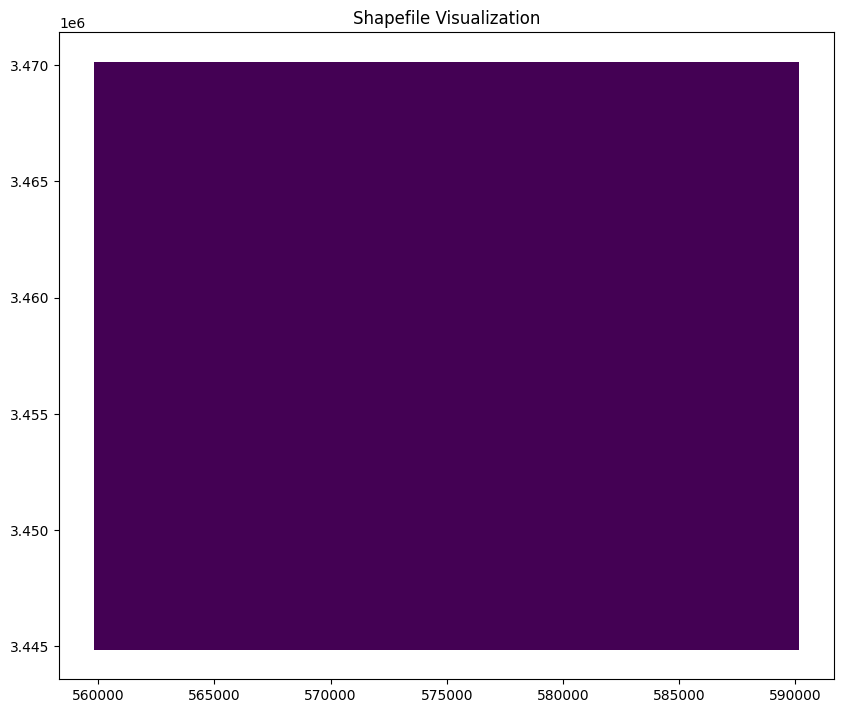

In [1]:
#Visualize Shapefiles

import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = 'post_vrt_outline_v2.shp'

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile data on the Matplotlib axis
gdf.plot(ax=ax, cmap='viridis')  # You can change the colormap as needed

# Add a title
plt.title('Shapefile Visualization')

# Display the plot
plt.show()


In [2]:
# Visualize Rasters

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    raster_data = src.read(1)  # Read the first band (change the index as needed)

    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



KeyboardInterrupt: 

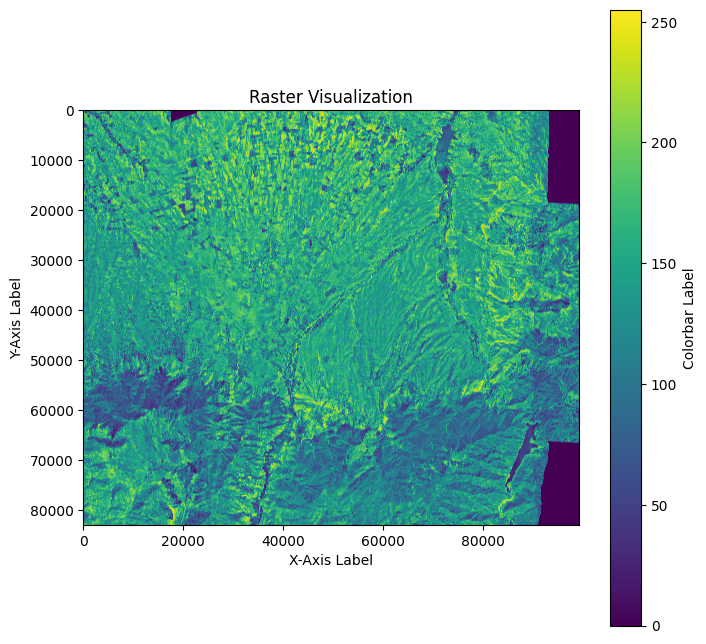

In [24]:
# Visualize Rasters

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('post_vrt_tiled_v2.tif') as src:
    raster_data = src.read(1)  # Read the first band (change the index as needed)

    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



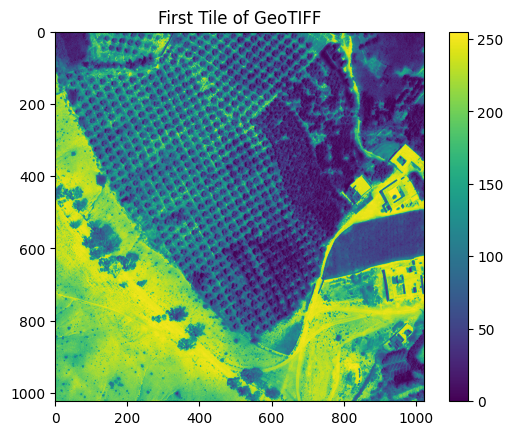

In [22]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('post_vrt_tiled_v2.tif') as src:
    # Read the first tile (index 0)
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Display the tile using matplotlib
    plt.imshow(tile, cmap='viridis')  # You can change the colormap as needed
    plt.title('First Tile of POST GeoTIFF')
    plt.colorbar()
    plt.show()


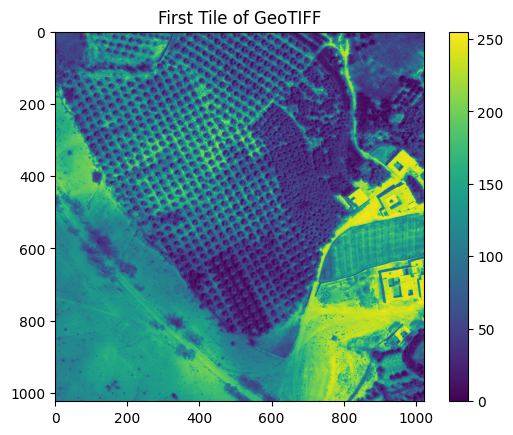

In [23]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    # Read the first tile (index 0)
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Display the tile using matplotlib
    plt.imshow(tile, cmap='viridis')  # You can change the colormap as needed
    plt.title('First Tile of PRE GeoTIFF')
    plt.colorbar()
    plt.show()
